In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
training_set=os.listdir("./training_set_df/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc/{data}"
        if df is None:
            df=pd.read_csv(file)
        else:
            d=pd.read_csv(file)
            df=pd.concat([df,d])


In [3]:
len(training_set)

22

In [4]:
df=df.astype(float)
df['label']=df['label'].astype(int)
df['label']=df['label'].astype("category")

In [5]:
test=pd.read_csv('./test_set_df/S08T1.csv')


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 30192 entries, 0 to 185
Data columns (total 2998 columns):
 #     Column                                              Dtype   
---    ------                                              -----   
 0     left_elbow_shoulder_hip mean_ft                     float64 
 1     left_elbow_shoulder_hip std_ft                      float64 
 2     left_elbow_shoulder_hip max_ft                      float64 
 3     left_elbow_shoulder_hip min_ft                      float64 
 4     left_elbow_shoulder_hip var_ft                      float64 
 5     left_elbow_shoulder_hip med_ft                      float64 
 6     left_elbow_shoulder_hip sum_ft                      float64 
 7     left_elbow_shoulder_hip std                         float64 
 8     left_elbow_shoulder_hip kurtosis                    float64 
 9     left_elbow_shoulder_hip skew                        float64 
 10    left_elbow_shoulder_hip quantile 25                 float64 
 11    left_

In [7]:
X=df.drop(["label","previous_label"],axis=1)
y=df['label']

In [8]:
X.shape

(30192, 2996)

In [9]:
y.shape

(30192,)

In [10]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [11]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [12]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [13]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [14]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [15]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
from sklearn.feature_selection import SelectKBest,f_regression
# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(300,columns="F_Score"))
# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

                                Input_Features      F_Score
280                       left_elbow_x mean_ft  1279.437132
286                        left_elbow_x sum_ft  1257.488789
285                        left_elbow_x med_ft  1239.348144
292                           left_elbow_x RMS  1229.443200
2891  movingright_shoulder right_wrist_ dx std  1176.610338
...                                        ...          ...
118                          left_eye_x sum_ft   574.336710
2661  movingright_shoulder left_eye_ dx std_ft   572.211560
125                             left_eye_x MAV   567.016344
360                   left_wrist_y quantile 25   566.897101
2765     movingright_shoulder right_ear dy std   566.748808

[300 rows x 2 columns]


In [17]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']

              precision    recall  f1-score   support

           0       0.75      0.61      0.67        82
           1       0.50      0.33      0.40         3
           2       0.86      0.95      0.90        19
           3       0.17      0.25      0.20         4
           4       0.52      0.52      0.52        46
           5       0.00      0.00      0.00         0
           6       0.71      1.00      0.83         5
           7       0.83      0.91      0.87        33
           8       0.75      0.86      0.80         7

    accuracy                           0.68       199
   macro avg       0.57      0.60      0.58       199
weighted avg       0.70      0.68      0.69       199



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

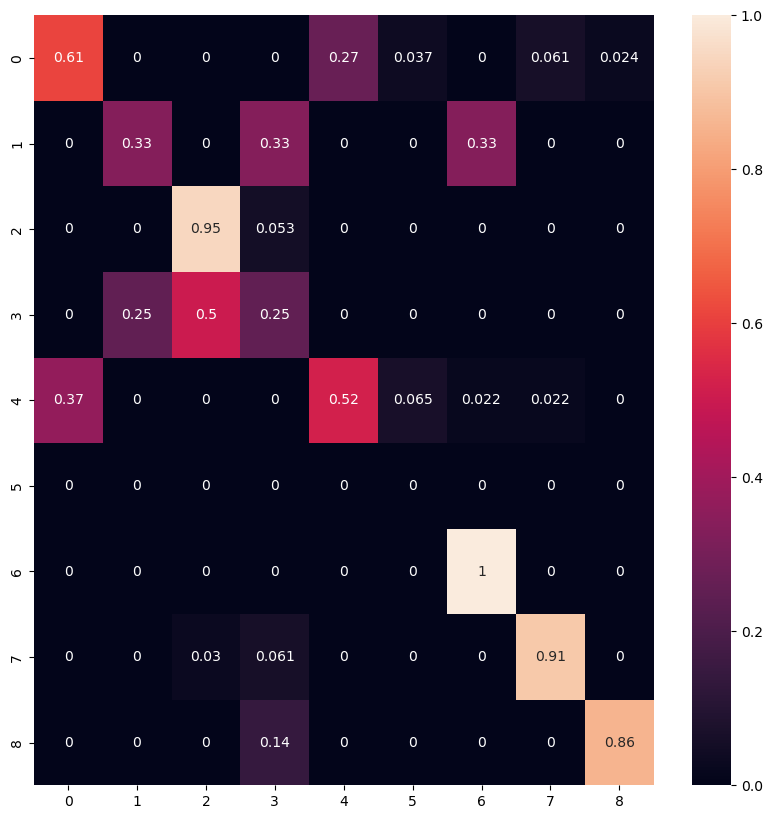

In [18]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=300,criterion='gini')
# rf.fit(all_feature_smote, all_label_smote)
filename = './smote_rf_model_acc.sav'
rf=joblib.load(filename)
pred_rf=rf.predict(X_test)

print(metrics.classification_report(pred_rf,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
sns.heatmap(conf,annot=True)



In [19]:
filename = './smote_rf_model_acc.sav'
joblib.dump(rf, filename)

['./smote_rf_model_acc.sav']

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        75
           1       0.50      0.20      0.29         5
           2       0.86      0.90      0.88        20
           3       0.33      0.33      0.33         6
           4       0.54      0.50      0.52        50
           5       0.17      1.00      0.29         1
           6       0.57      1.00      0.73         4
           7       0.83      0.91      0.87        33
           8       0.62      1.00      0.77         5

    accuracy                           0.65       199
   macro avg       0.57      0.71      0.59       199
weighted avg       0.66      0.65      0.65       199



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

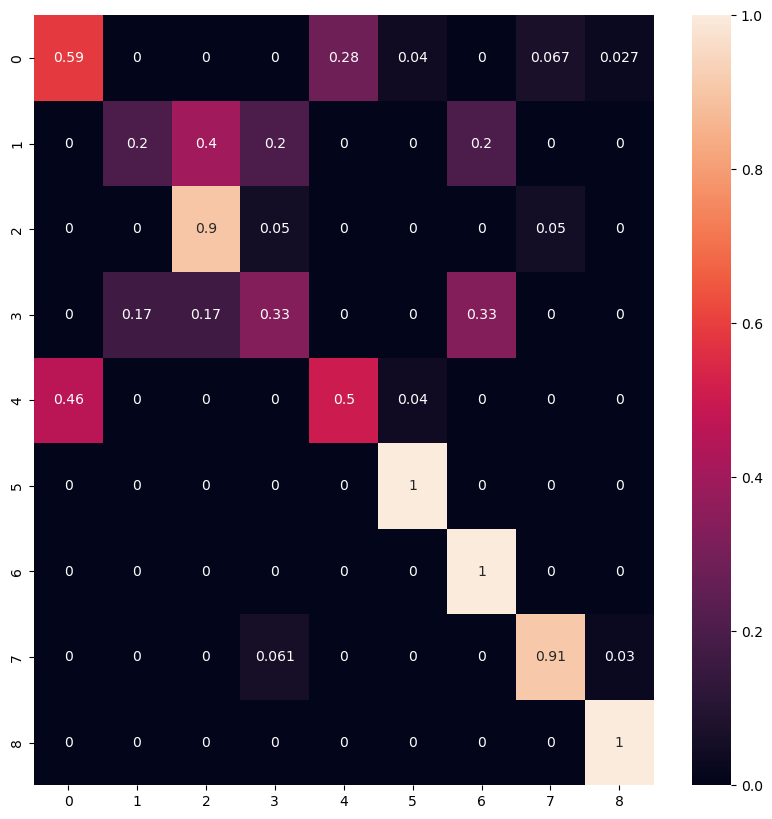

In [22]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost.callback import EarlyStopping
early_stop = EarlyStopping(
    rounds=2, metric_name='logloss', data_name='Validation_0', save_best=True
)
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10,callbacks=[early_stop])
# # xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(all_feature_smote, all_label_smote)
filename = './smote_xgb_model_acc.sav'
xgbcl=joblib.load(filename)
pred_xgb=xgbcl.predict(X_test)
from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [ ]:
# X_train_with_predictions.shape

In [ ]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [23]:
filename = './smote_xgb_model_acc.sav'
joblib.dump(xgbcl, filename)

['./smote_xgb_model_acc.sav']

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# HGBC=HistGradientBoostingClassifier(random_state=10)
# HGBC.fit(X_train,y_train)
# pred=HGBC.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [ ]:
# trainX=np.array(X_train)
# testX=np.array(X_test)
# trainY=np.array(y_train)
# testY=np.array(y_test)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Conv1D(128,128, activation='relu', input_shape=(len(trainX[1]), 1)))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(64, 64, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# # model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Conv1D(64, 32, activation='relu'))
# model.add(layers.MaxPooling1D(2))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='softmax'))
# # model.add(layers.Dense(32, activation='softmax'))
# model.add(layers.Dense(9,activation='softmax'))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping])

In [ ]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [ ]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [24]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './smote_xgb_model_acc.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/xgb/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,ID,accuracy,weighted avg F1-score
0,S08T1,0.653266,0.649481
1,S08T2,0.661836,0.666289
2,N11T1,0.706349,0.742450
3,N11T2,0.709677,0.721425
4,N06T1,0.521739,0.539810
5,S02T2,0.630303,0.658002
6,N06T2,0.642105,0.687752
7,S02T1,0.646766,0.676438
8,N02T2,0.530864,0.542534
9,N02T1,0.609195,0.632011


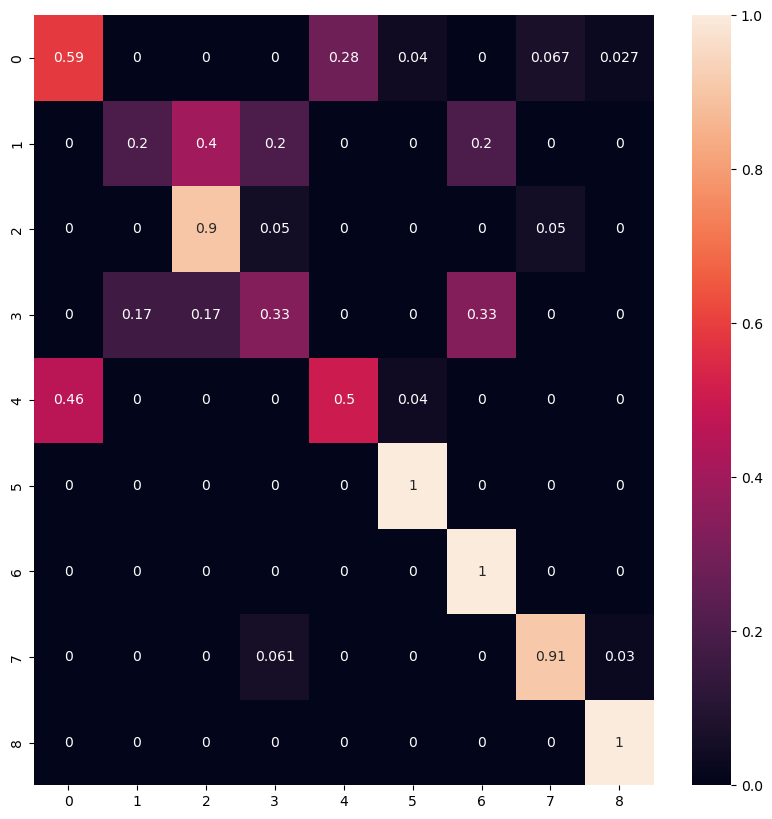

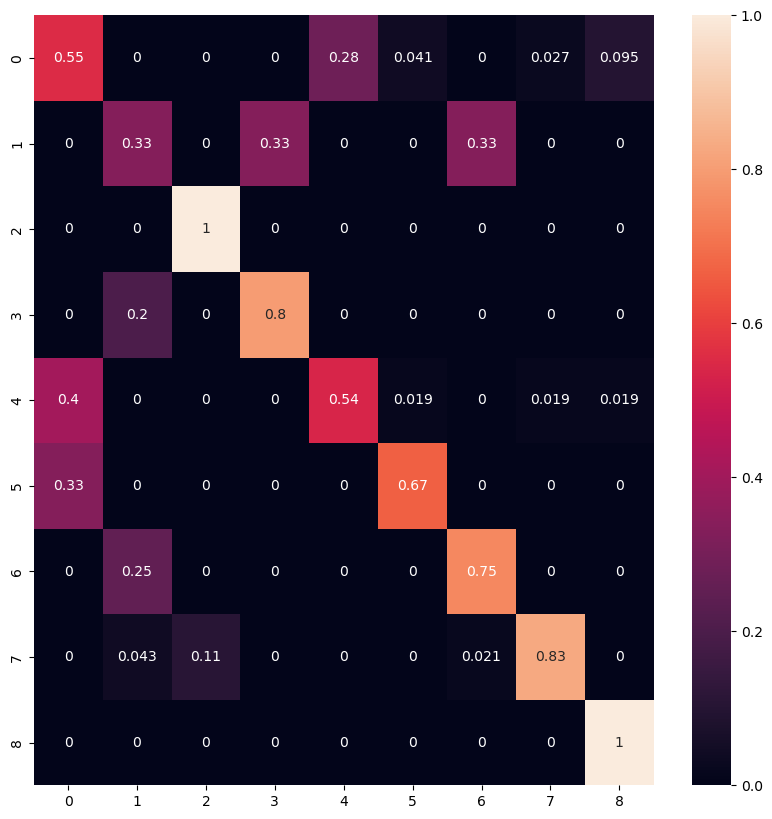

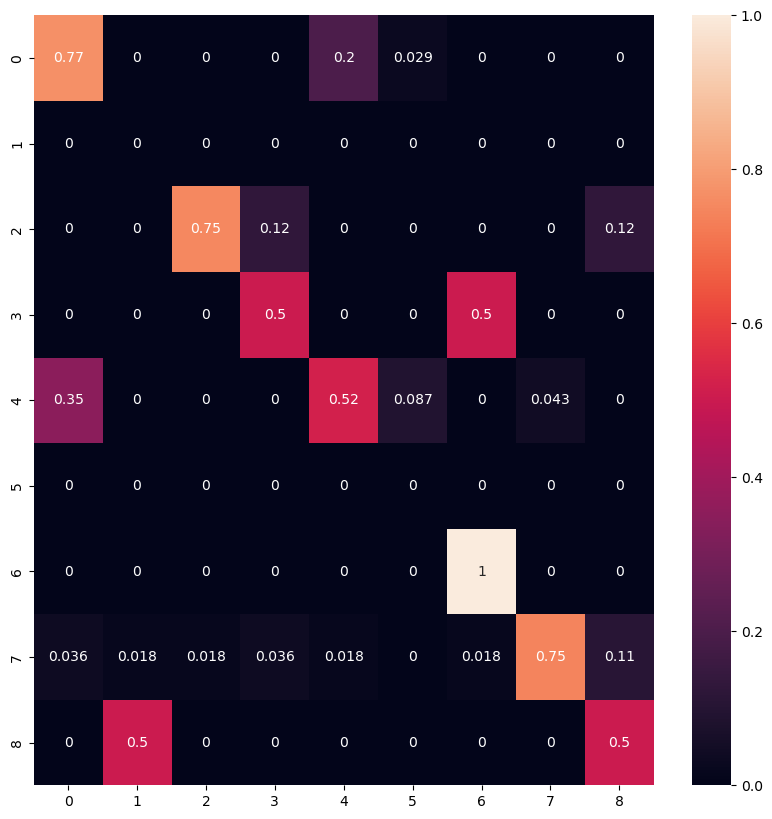

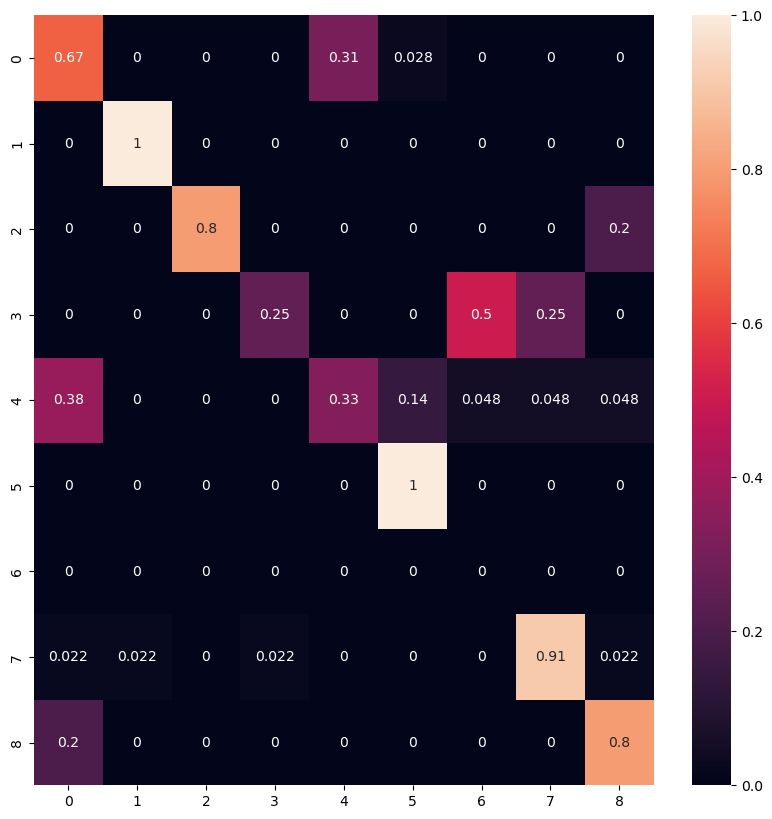

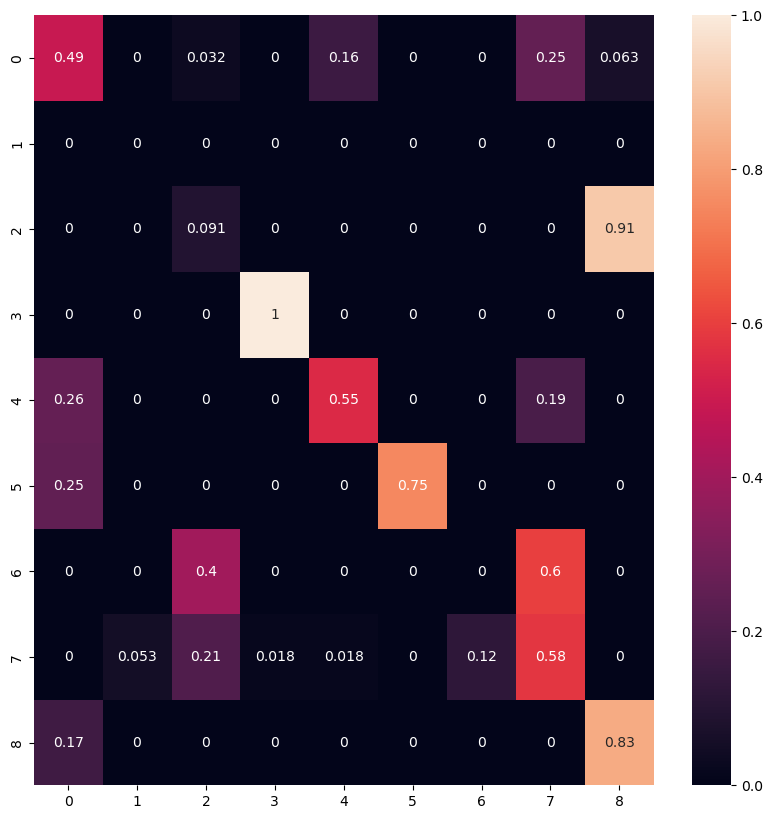

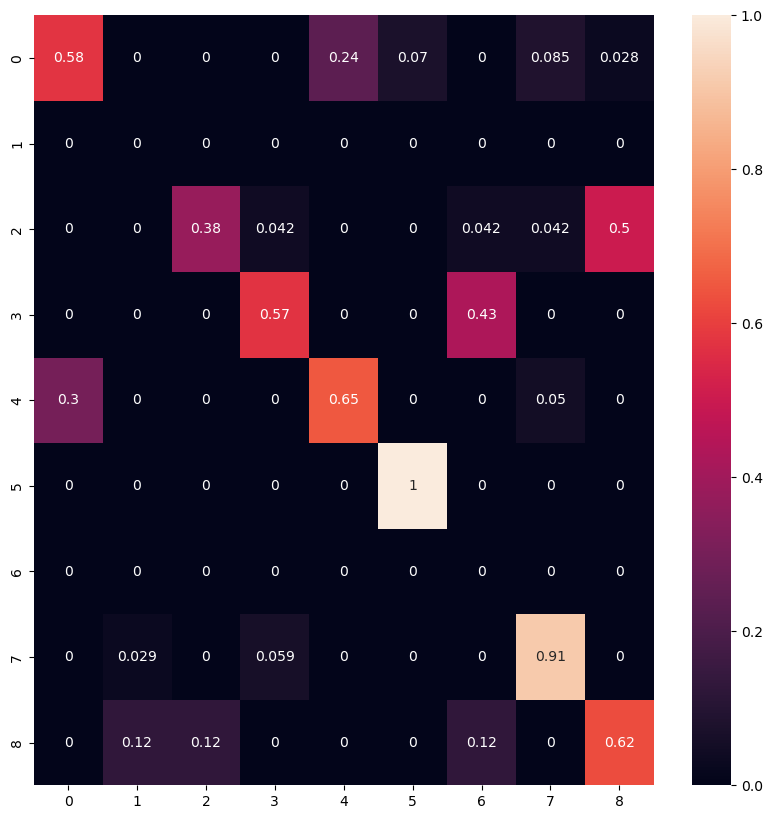

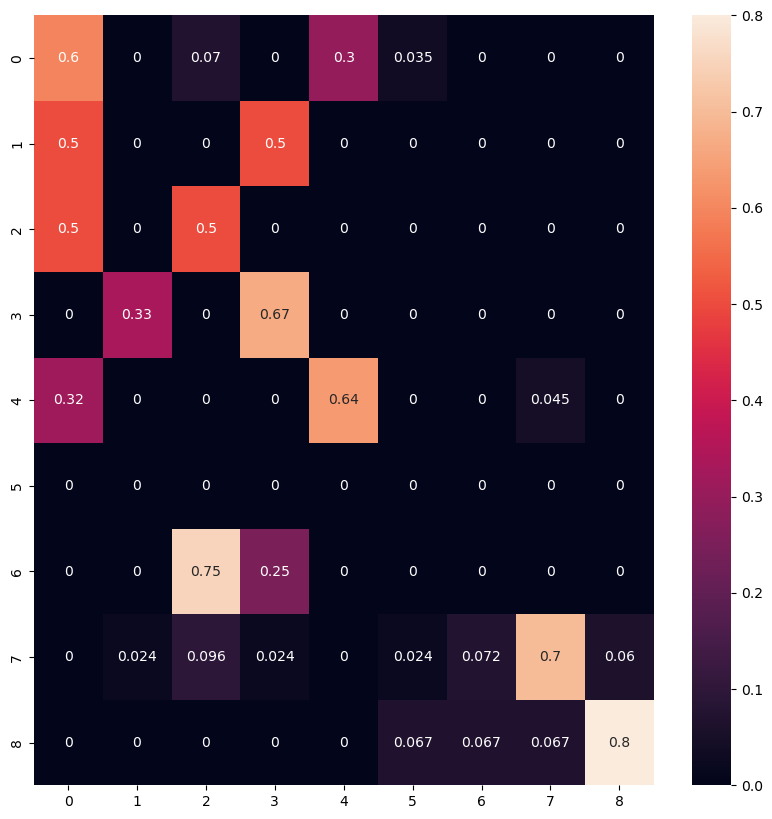

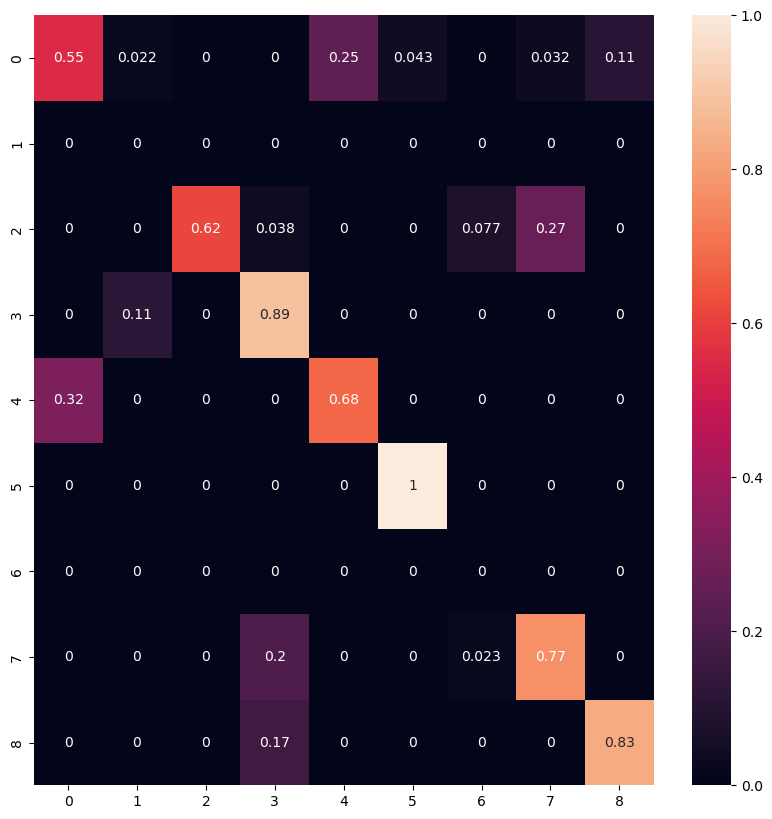

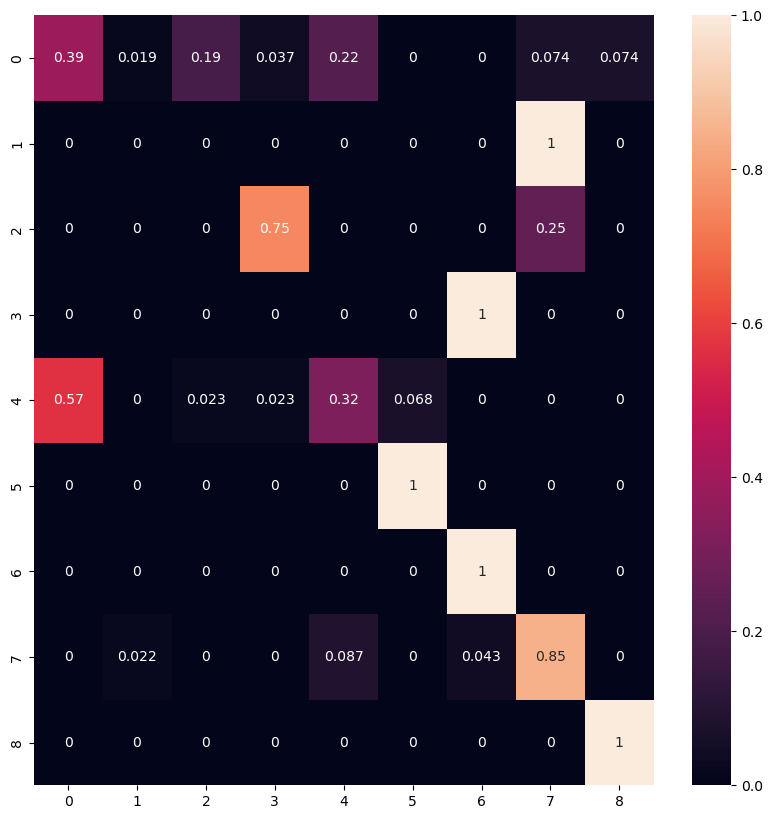

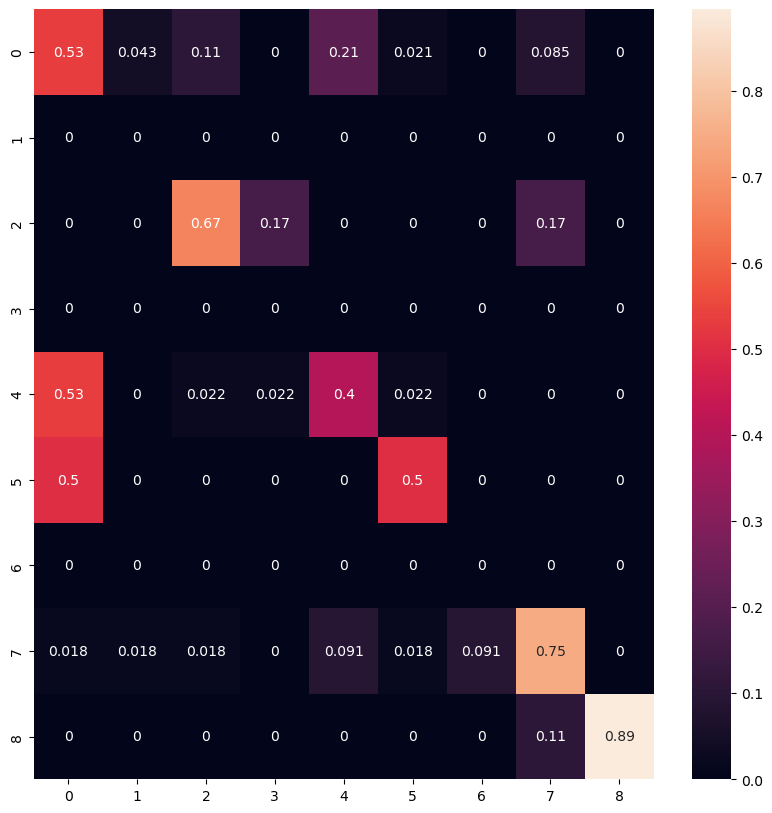

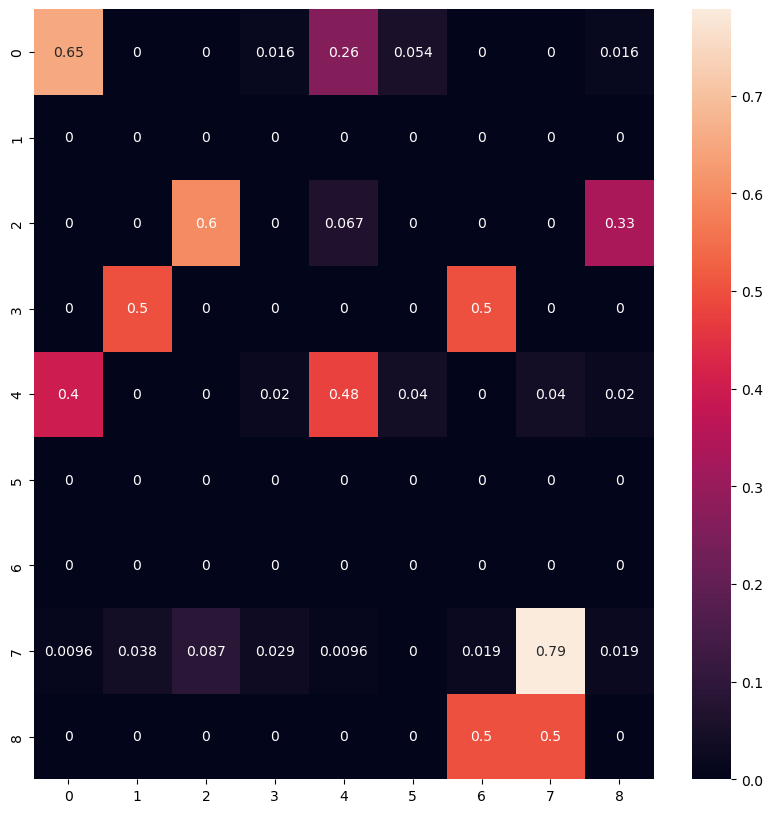

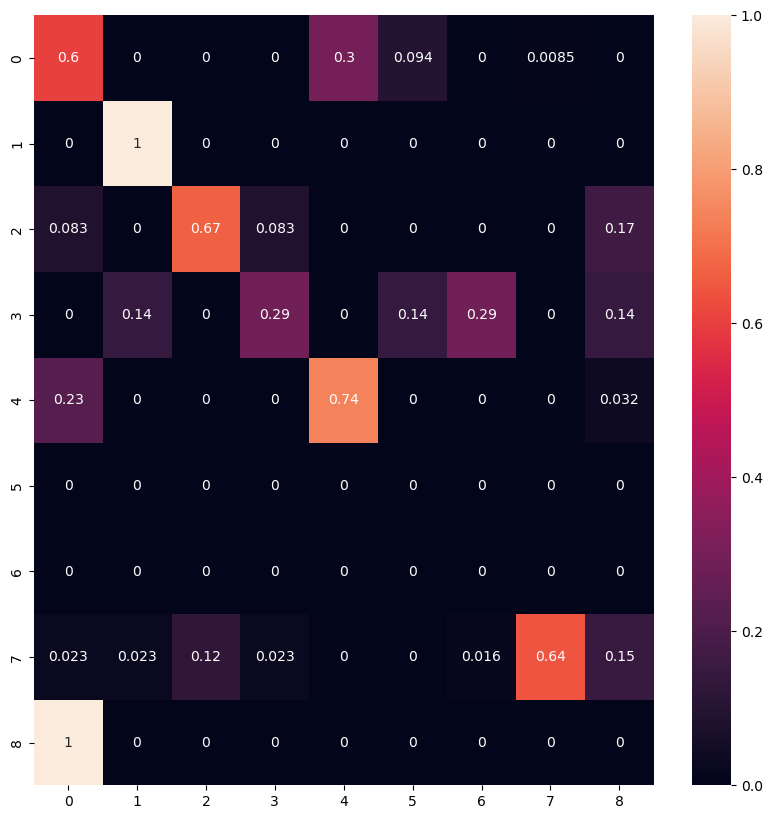

In [25]:
test_set=os.listdir('./test_set_df_acc')
out_xgb=[]
for ID in test_set:
    output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score'])
out_df_xgb

In [26]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df_acc/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './smote_rf_model_acc.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/rf/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.623143,0.669292
std,0.052838,0.051293
min,0.518519,0.570259
25%,0.606149,0.656686
50%,0.633040,0.687040
75%,0.659800,0.701136
max,0.685484,0.732085


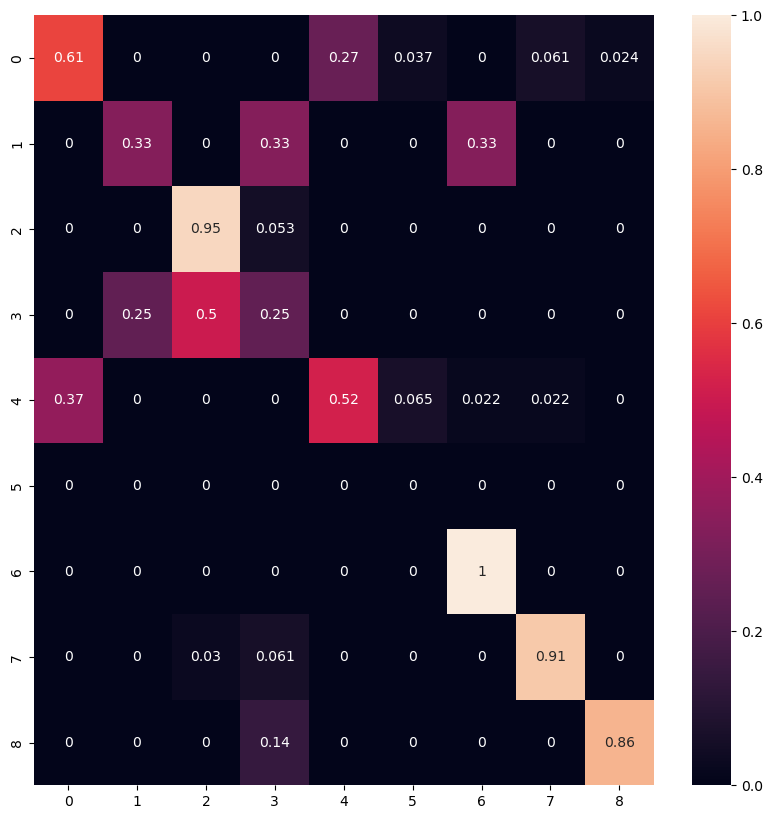

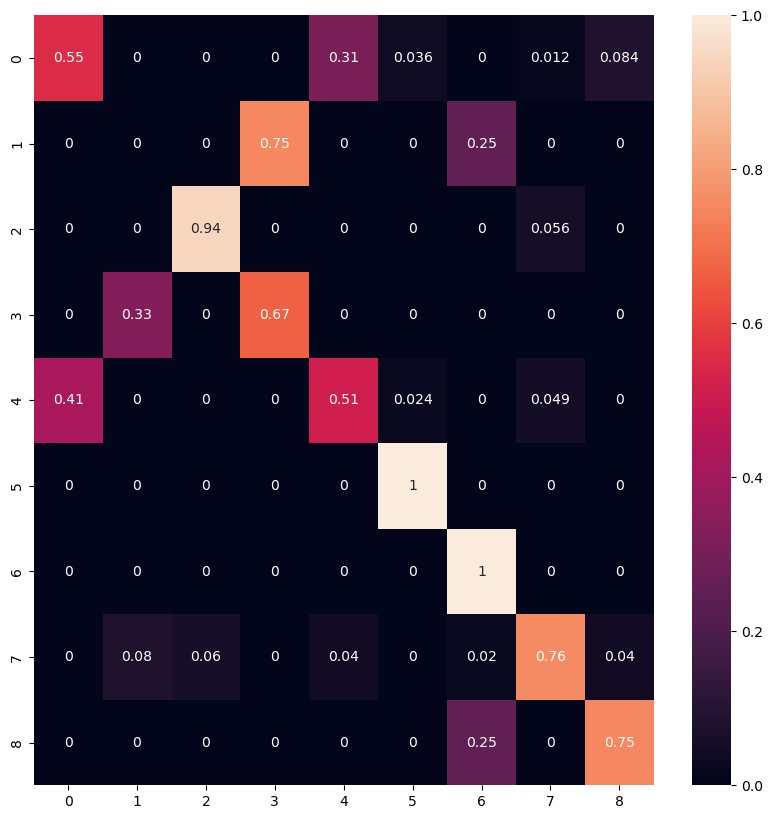

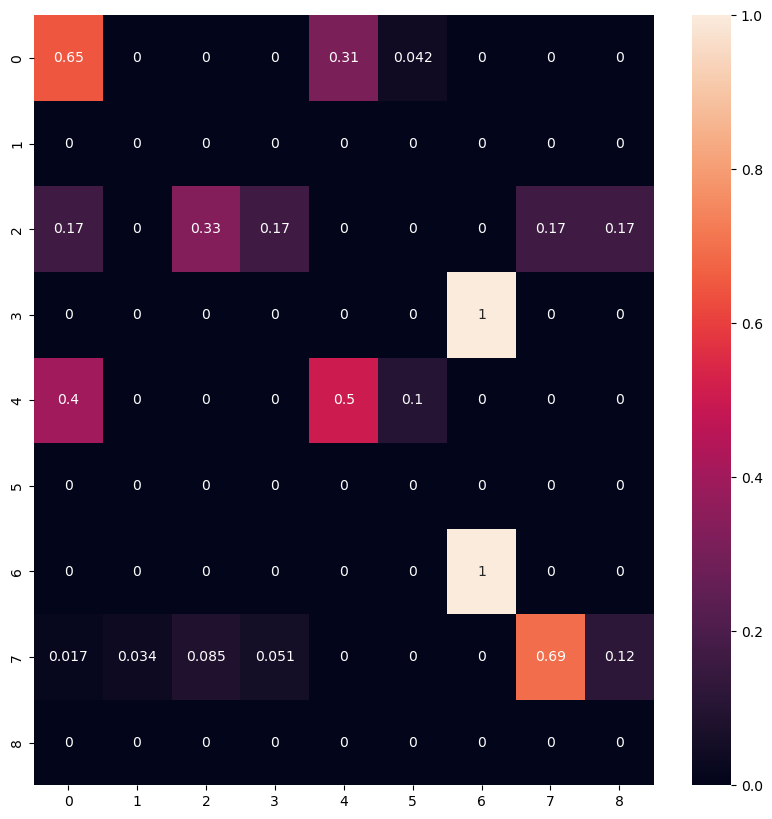

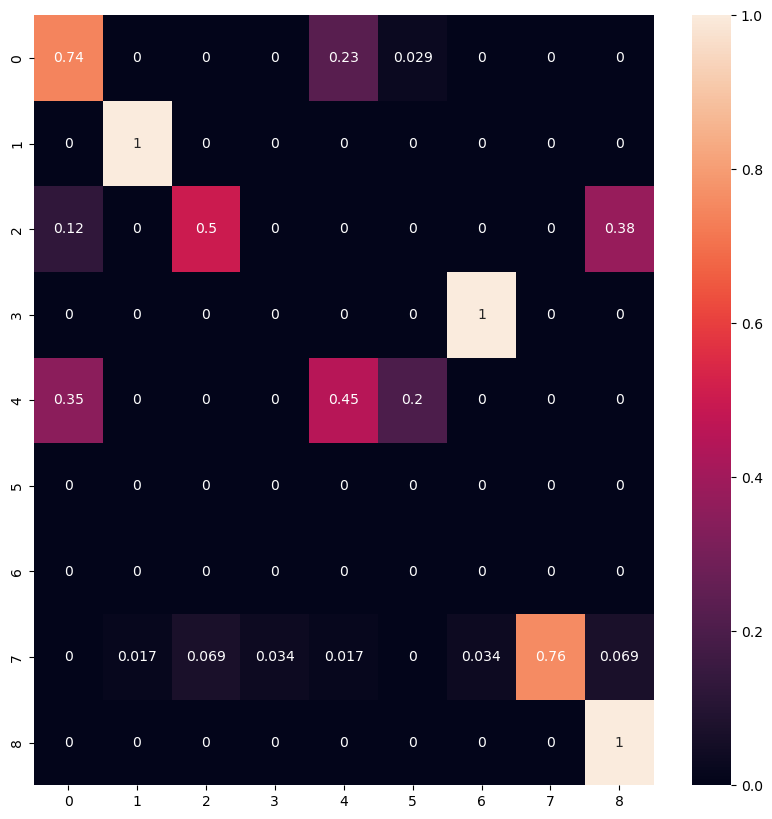

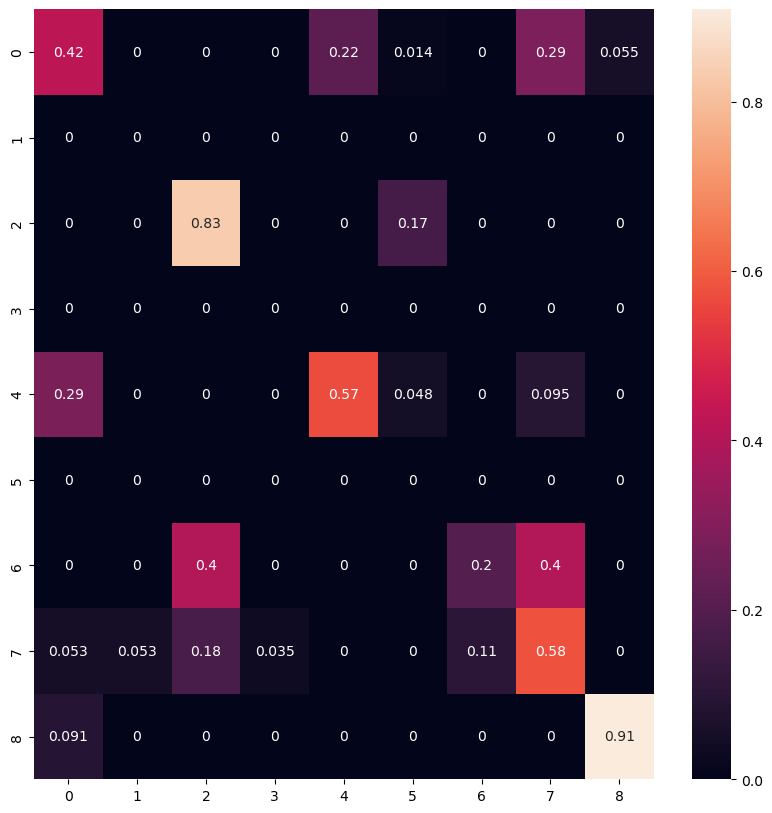

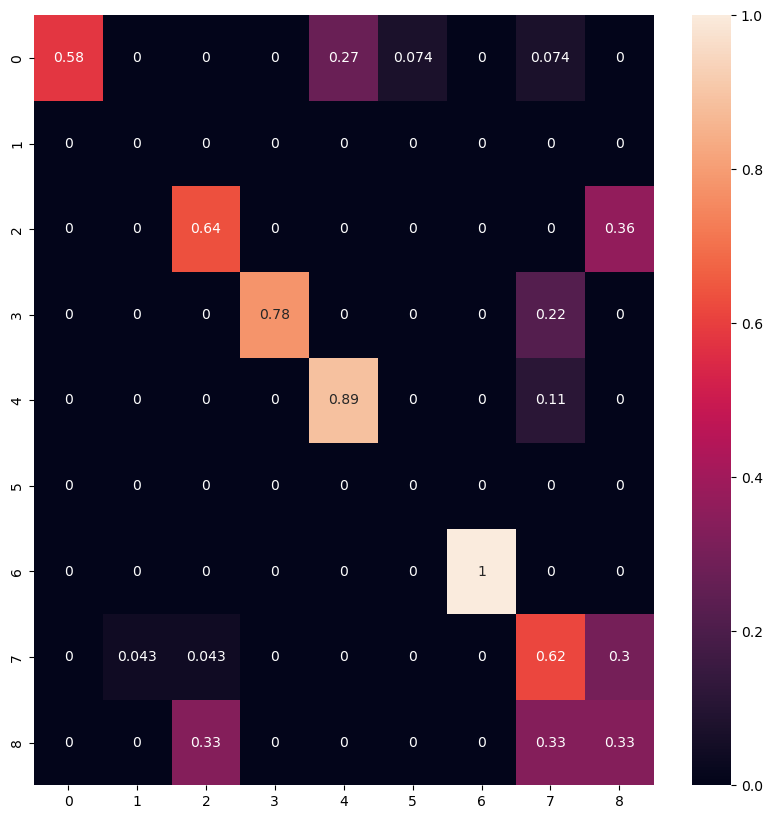

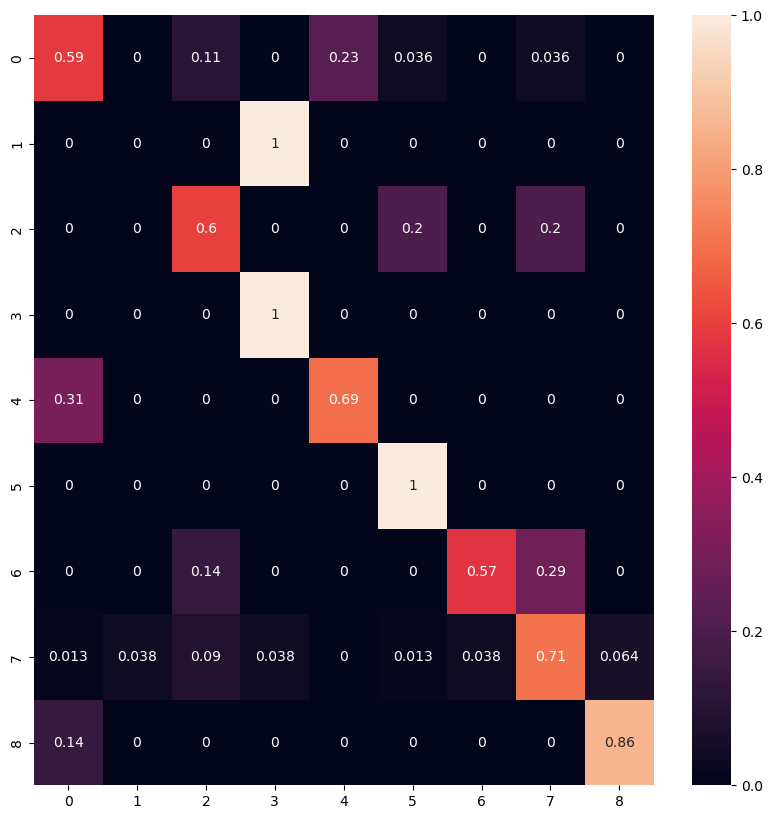

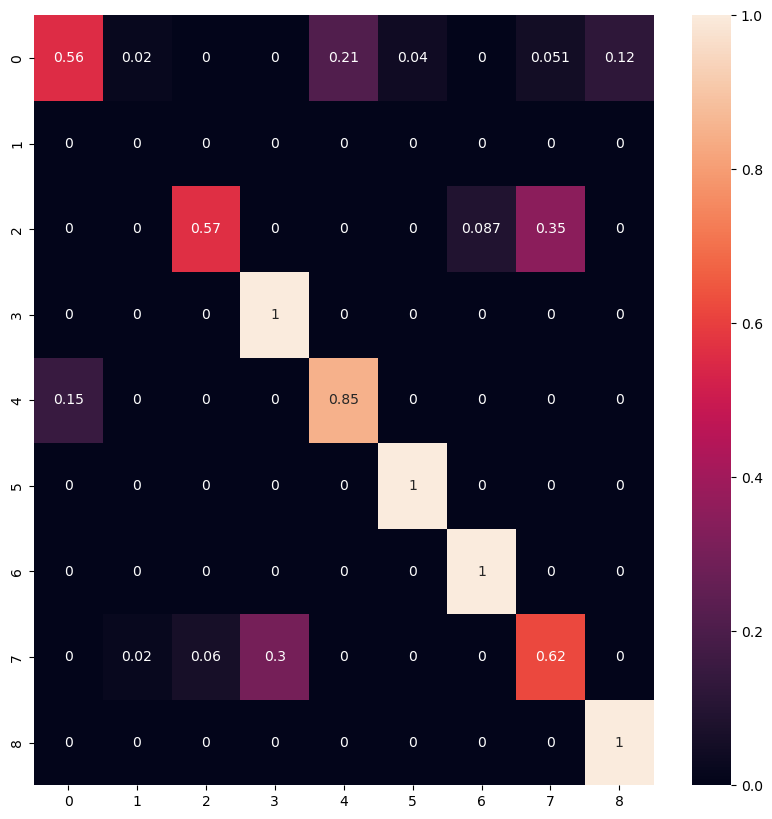

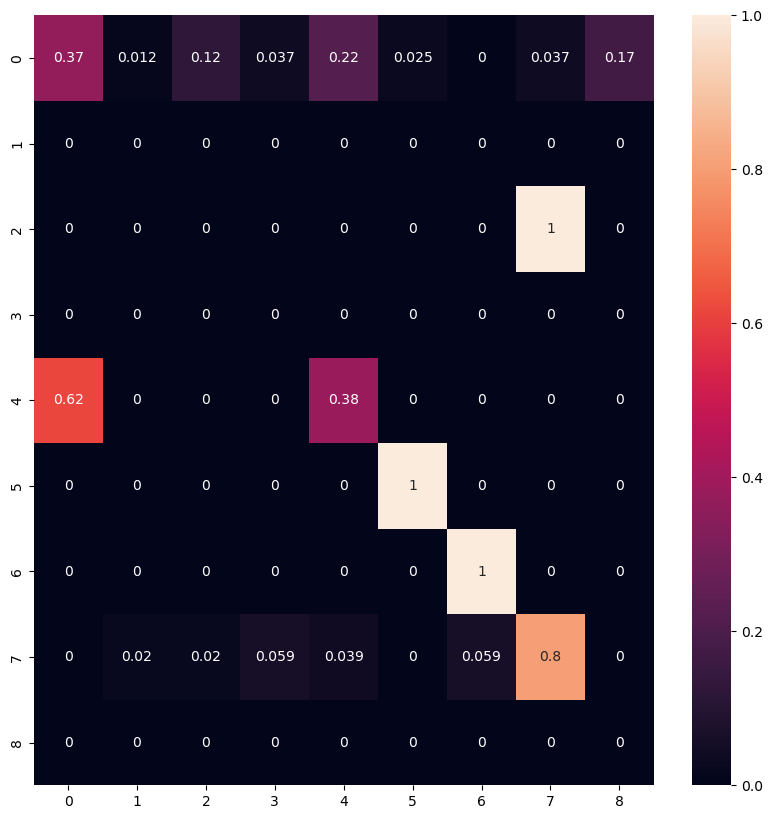

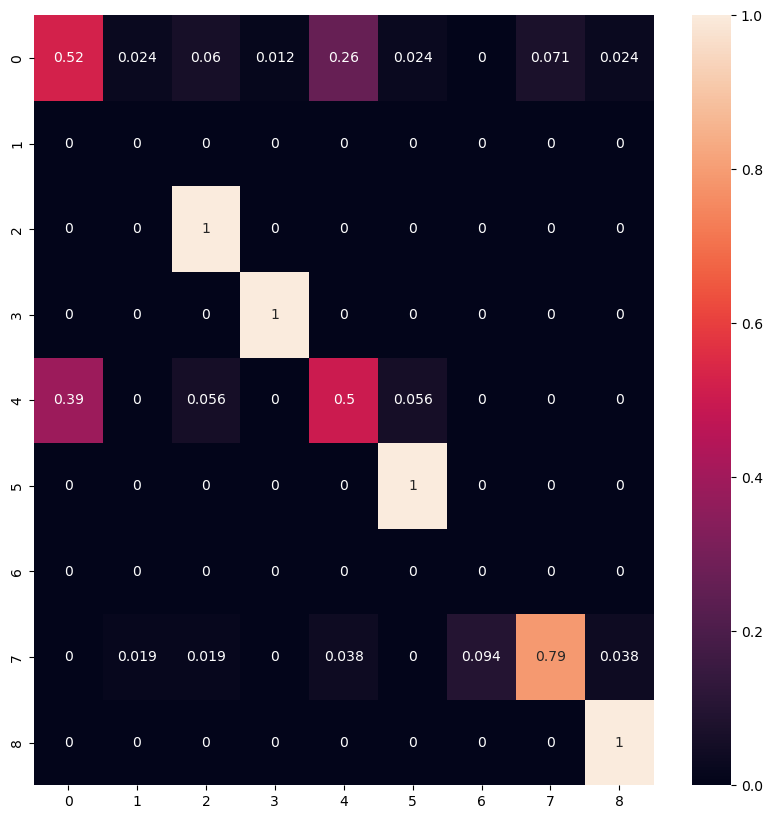

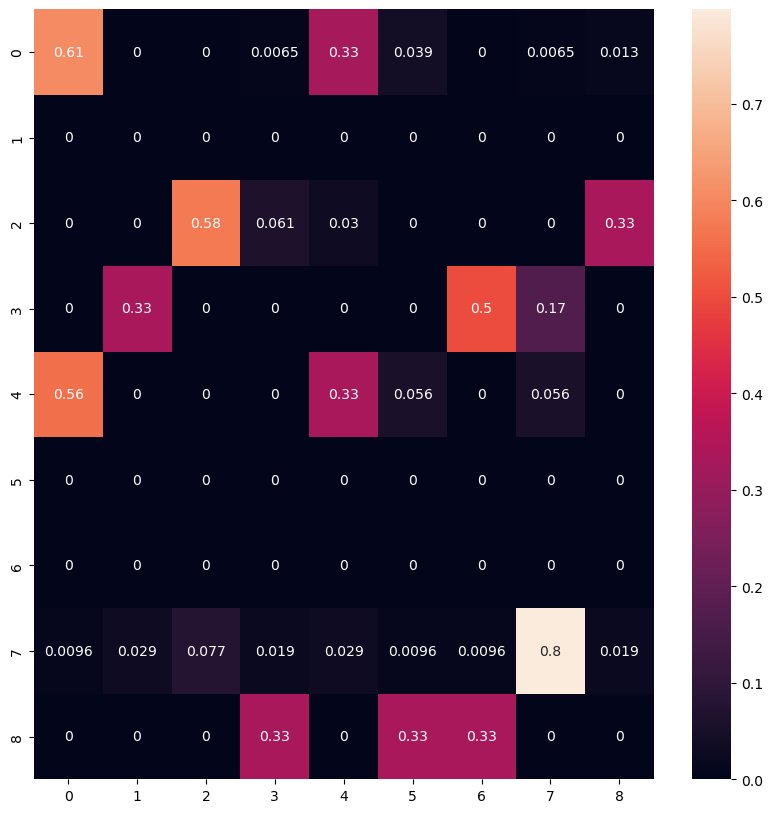

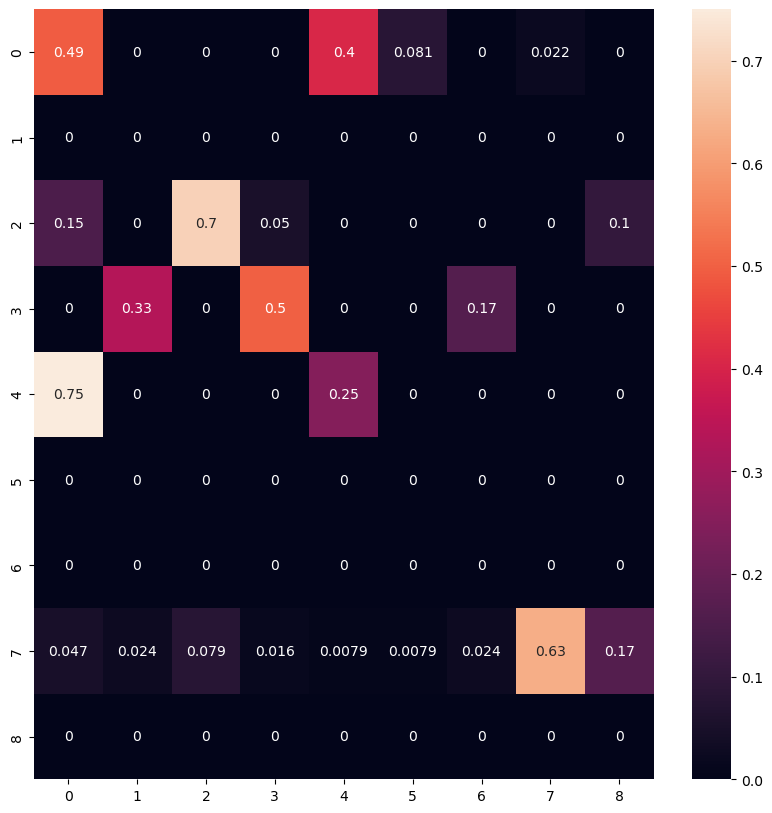

In [27]:
test_set=os.listdir('./test_set_df_acc')
out_rf=[]
for ID in test_set:
    output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score'])
out_df.describe()

In [28]:
out_df.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.623143,0.669292
std,0.052838,0.051293
min,0.518519,0.570259
25%,0.606149,0.656686
50%,0.633040,0.687040
75%,0.659800,0.701136
max,0.685484,0.732085


In [29]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.632534,0.658959
std,0.057654,0.062772
min,0.521739,0.539810
25%,0.621996,0.645113
50%,0.644436,0.671363
75%,0.655409,0.694028
max,0.709677,0.742450
